<div style="width:50%; float:left;">
    <img src="support_files/AIBS_banner.png" width="430" align="left">
</div>

<div style="width:50%; float:right;">
    <img src="support_files/Dipde_Nick_final.png" width="100" height="100" align="right">
</div>

<div style="width:100%; float:left;">
    <hr>
</div>



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h1>Example: Recurrent</h1>
<p> In this example, two internal dipde populations (one labeled "excitatory" and the other "inhibitory") receive from a several external populations. Try adjusting the strength of the recurrent connections, and see how this changes the steady state firing rates of the populations.  The parameters `dv` and `dt` control the fundamental tradeoff between the accuracy of the simulation and its execution time.  You might find it helpful to consider smaller values of these parameters at first, and then try reducing them once you have set the recurrent connection weights.

In [1]:
%matplotlib inline
import dipde
assert dipde.__version__ == '0.2.1'
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as ipw
import logging
from IPython.display import HTML
logging.disable(logging.CRITICAL)

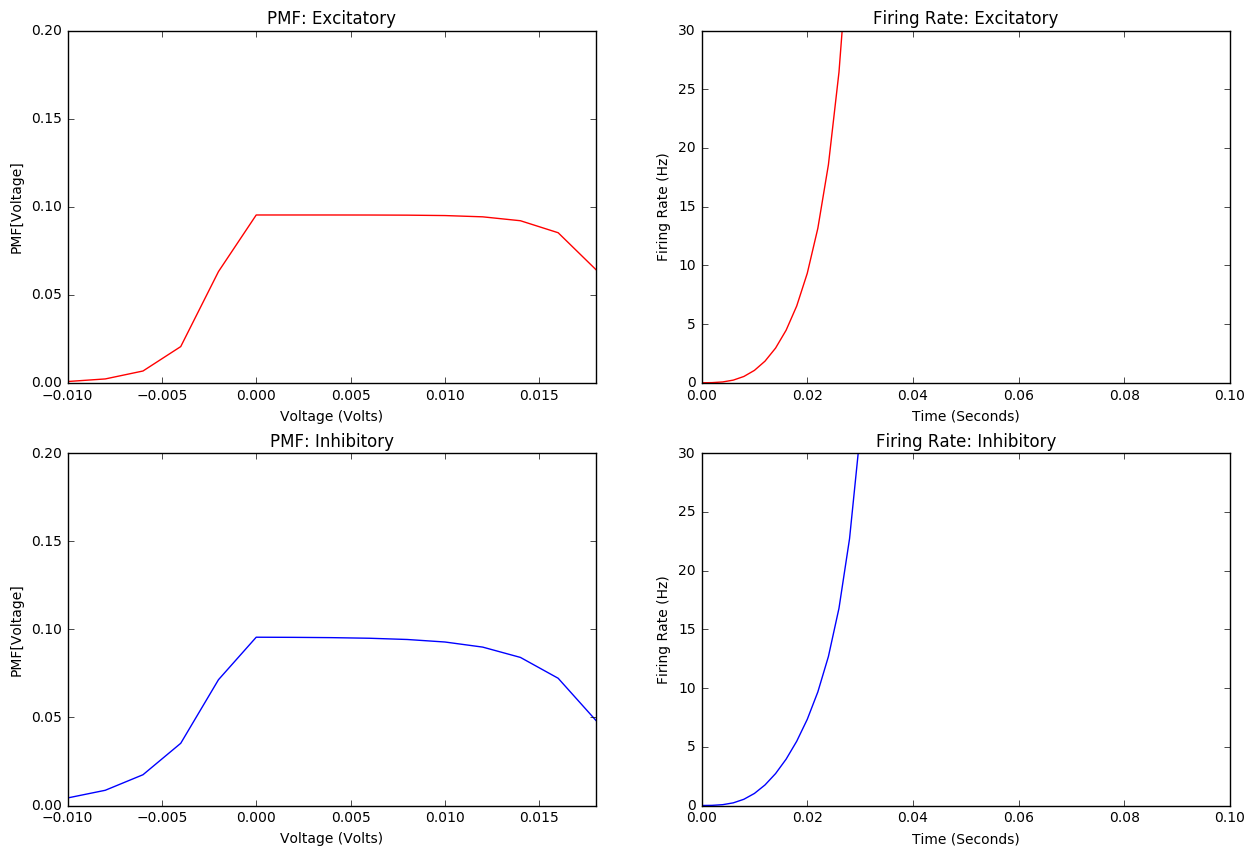

In [2]:
t0 = 0.
v_min = -.01
v_max = .02
tf = .1
tau_m=.02
weights=.001
bgfr = 800

# Progress bar:
fltp = ipw.FloatProgress()
display(fltp)
def update_callback(n):
    fltp.value += 1

initial_nsyn = 25
nsyn_ee = ipw.IntSlider(min=0,max=2*initial_nsyn,step=1,value=initial_nsyn, continuous_update=False)
nsyn_ei = ipw.IntSlider(min=0,max=2*initial_nsyn,step=1,value=initial_nsyn, continuous_update=False)
nsyn_ie = ipw.IntSlider(min=0,max=2*initial_nsyn,step=1,value=initial_nsyn, continuous_update=False)
nsyn_ii = ipw.IntSlider(min=0,max=2*initial_nsyn,step=1,value=initial_nsyn, continuous_update=False)
dv = ipw.FloatSlider(min=.0001,max=.005,step=.0001,value=.002, continuous_update=False)
dt = ipw.FloatSlider(min=.0001,max=.005,step=.0001,value=.002, continuous_update=False)

@ipw.interact(nsyn_ee=nsyn_ee, nsyn_ei=nsyn_ei, nsyn_ie=nsyn_ie, nsyn_ii=nsyn_ii, dt=dt, dv=dv)
def f(nsyn_ee, nsyn_ei, nsyn_ie, nsyn_ii, dv, dt):

    fltp.min = 0
    fltp.max = int((tf-t0)/dt)
                       
    
    fltp.value = 0
    
    b = dipde.ExternalPopulation(bgfr)
    ie = dipde.InternalPopulation(v_min=v_min, tau_m=tau_m, v_max=v_max, dv=dv, update_method='gmres')
    ii = dipde.InternalPopulation(v_min=v_min, tau_m=tau_m, v_max=v_max, dv=dv, update_method='gmres')

    b_ie = dipde.Connection(b, ie, 1, weights=weights)
    b_ii = dipde.Connection(b, ii, 1, weights=weights)
    ie_ie = dipde.Connection(ie, ie, nsyn_ee, weights=weights)
    ie_ii = dipde.Connection(ie, ii, nsyn_ei, weights=weights)
    ii_ie = dipde.Connection(ii, ie, nsyn_ie, weights=-weights)
    ii_ii = dipde.Connection(ii, ii, nsyn_ii, weights=-weights)
    
    network = dipde.Network([b, ie, ii], [b_ie, b_ii, ie_ie, ie_ii, ii_ie, ii_ii], update_callback=update_callback)
    simulation_configuration = dipde.SimulationConfiguration(dt, tf, t0=t0)
    simulation = dipde.Simulation(network=network, simulation_configuration=simulation_configuration)
    simulation.run()

    fig, ax = plt.subplots(2,2, figsize=(15,10))
    ie.plot_probability_distribution(ax=ax[0,0], ylim=(0.,100*dv), color='r', show=False, title='PMF: Excitatory')
    ii.plot_probability_distribution(ax=ax[1,0], ylim=(0.,100*dv), color='b', show=False, title='PMF: Inhibitory')
    ie.plot(ax=ax[0,1], ylim=(0,30), color='r', show=False, title='Firing Rate: Excitatory')
    ii.plot(ax=ax[1,1], ylim=(0,30), color='b', show=True, title='Firing Rate: Inhibitory')